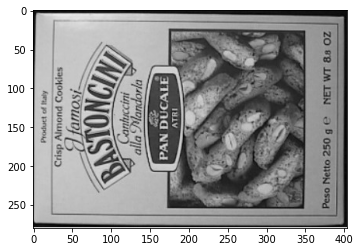

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
from pylab import *
import matplotlib.pyplot as plt
import math
from scipy.ndimage.filters import gaussian_filter

image = np.array(Image.open("qqq.jpg").convert('RGB'))
img = image.copy()
#перевести изображение в полутоновое
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #sum = numpyimg[i,j,0] * 0.299 + numpyimg[i,j,1] * 0.587 + numpyimg[i,j,2] * 0.114
        #temp[i][j] = sum
        
        #sum = numpyimg[i,j,0] + numpyimg[i,j,1] + numpyimg[i,j,2]
        #sum/=3
        #data2[i,j] = [sum, sum, sum]

        sum = (int(img[i, j, 0]) + int(img[i, j, 1]) + int(img[i, j, 2]))/3
        img[i, j] = [sum, sum, sum]

plt.imshow(img)
plt.show()

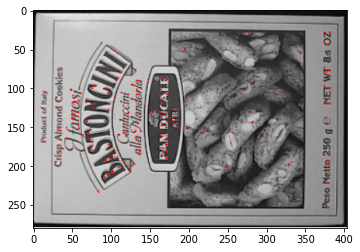

1137


In [ ]:
t = 40
n = 12

array_ot = []
img2 = img.copy()
sum = 0
for i in range(3, img.shape[0] - 3):
    for j in range(3, img.shape[1] -3):
        if img[i-3,j,0] > img[i,j,0] + t and img[i+3,j,0] > img[i,j,0] + t or img[i,j-3,0] > img[i,j,0] + t and img[i,j+3,0] > img[i,j,0] + t:
          arr = []
          for k in range(2):
            arr.append(img[i-3,j,0] > img[i,j,0] + t) #1
            arr.append(img[i-3,j+1,0] > img[i,j,0] + t) #2
            arr.append(img[i-2,j+2,0] > img[i,j,0] + t) #3
            arr.append(img[i-1,j+3,0] > img[i,j,0] + t) #4
            arr.append(img[i,j+3,0] > img[i,j,0] + t) #5
            arr.append(img[i+1,j+3,0] > img[i,j,0] + t) #6
            arr.append(img[i+2,j+2,0] > img[i,j,0] + t) #7
            arr.append(img[i+3,j+1,0] > img[i,j,0] + t) #8
            arr.append(img[i+3,j,0] > img[i,j,0] + t) #9
            arr.append(img[i+3,j-1,0] > img[i,j,0] + t) #10
            arr.append(img[i+2,j-2,0] > img[i,j,0] + t) #11
            arr.append(img[i+1,j-3,0] > img[i,j,0] + t) #12
            arr.append(img[i,j-3,0] > img[i,j,0] + t) #13
            arr.append(img[i-1,j-3,0] > img[i,j,0] + t) #14
            arr.append(img[i-2,j-2,0] > img[i,j,0] + t) #15
            arr.append(img[i-3,j-1,0] > img[i,j,0] + t) #16
          flag = False
          s = 0
          for g in range(32):
            if arr[g]:
              s+=1
              if s == 12:
                flag = True
                break
            else:
              s = 0
          
          if flag:
            img2[i,j] = [255,0,0]
            array_ot.append([i,j])
            sum += 1
        if img[i-3,j,0] < img[i,j,0] - t and img[i+3,j,0] < img[i,j,0] - t or img[i,j-3,0] < img[i,j,0] - t and img[i,j+3,0] < img[i,j,0] - t:
          arr = []
          for k in range(2):
            arr.append(img[i-3,j,0] < img[i,j,0] - t) #1
            arr.append(img[i-3,j+1,0] < img[i,j,0] - t) #2
            arr.append(img[i-2,j+2,0] < img[i,j,0] - t) #3
            arr.append(img[i-1,j+3,0] < img[i,j,0] - t) #4
            arr.append(img[i,j+3,0] < img[i,j,0] - t) #5
            arr.append(img[i+1,j+3,0] < img[i,j,0] - t) #6
            arr.append(img[i+2,j+2,0] < img[i,j,0] - t) #7
            arr.append(img[i+3,j+1,0] < img[i,j,0] - t) #8
            arr.append(img[i+3,j,0] < img[i,j,0] - t) #9
            arr.append(img[i+3,j-1,0] < img[i,j,0] - t) #10
            arr.append(img[i+2,j-2,0] < img[i,j,0] - t) #11
            arr.append(img[i+1,j-3,0] < img[i,j,0] - t) #12
            arr.append(img[i,j-3,0] < img[i,j,0] - t) #13
            arr.append(img[i-1,j-3,0] < img[i,j,0] - t) #14
            arr.append(img[i-2,j-2,0] < img[i,j,0] - t) #15
            arr.append(img[i-3,j-1,0] < img[i,j,0] - t) #16
          flag = False
          s = 0
          for g in range(32):
            if arr[g]:
              s+=1
              if s == 12:
                flag = True
                break
            else:
              s = 0
          
          if flag:
            img2[i,j] = [255,0,0]
            array_ot.append([i,j])
            sum += 1
plt.imshow(img2)
plt.show()
print(sum)


In [ ]:
import cv2
img3 = img.copy()
sobelx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobely = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
imgx = cv2.filter2D(img3, -1, sobelx)
imgy = cv2.filter2D(img3, -1, sobely)

sigma = 1.3
filter = np.zeros((5,5), dtype=np.float)
p=1 #кол-во нулей
for i in range(-2,3):
  for j in range(-2,3):
    filter[i+p,j+p]=np.exp(-(i**2+j**2)/(2*(sigma**2)))
filter/=(np.sqrt(np.pi*2)*(sigma**2))
filter/=filter.sum()
filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


array([[0.0575746 , 0.07739634, 0.0575746 , 0.02370077, 0.02370077],
       [0.07739634, 0.10404229, 0.07739634, 0.03186045, 0.03186045],
       [0.0575746 , 0.07739634, 0.0575746 , 0.02370077, 0.02370077],
       [0.02370077, 0.03186045, 0.02370077, 0.0097565 , 0.0097565 ],
       [0.02370077, 0.03186045, 0.02370077, 0.0097565 , 0.0097565 ]])

In [ ]:
import numpy as np

k = 0.06

array_R = []
for i in range(len(array_ot)):
  x = array_ot[i][0]
  y = array_ot[i][1]
  M = np.zeros((2,2))
  for u in range(filter.shape[0]):
    for v in range(filter.shape[1]):
      A = np.array([[imgx[x + u, y + v][0]**2, imgx[x + u, y + v][0] * imgy[x + u, y + v][0]], 
                     [imgy[x + u, y + v][0] * imgx[x + u, y + v][0], imgy[x + u, y + v][0]**2]])
      M += filter[u,v] * A
  array_R.append(np.linalg.det(M) - k * np.trace(M)**2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


In [ ]:
array_R


[169296278.2264974,
 203690222.58379167,
 -14173346.610610835,
 -37373356.56721055,
 2234795.172456457,
 30324598.5670717,
 2663166.555991901,
 -2228346.011835323,
 31501.886694626068,
 32977.580508336425,
 325810628.4487779,
 393492361.4193195,
 -36843182.2980825,
 -442229.8201914511,
 -78149.64680310716,
 134439.97467669848,
 201429.98338145166,
 58412.46509747283,
 194335.7518662567,
 607978.4896196019,
 314960201.4456903,
 244015460.6602189,
 110977674.19899642,
 65004375.135717236,
 218350420.53568184,
 145844809.7146917,
 72754210.58611548,
 112061733.34981146,
 46466922.0823764,
 105454483.7824359,
 187850794.36047196,
 56179903.35923259,
 85843447.34899534,
 39293495.81996248,
 76303892.2059682,
 52692222.546418376,
 28232144.941135425,
 92180587.72859338,
 51332145.31483424,
 -38951906.39228991,
 3003.5816766714706,
 -365.557108967151,
 59823598.78405266,
 189272882.3151801,
 54285291.95882456,
 19036587.276827376,
 64998702.63844918,
 60589660.63928667,
 47123122.2891503,
 10

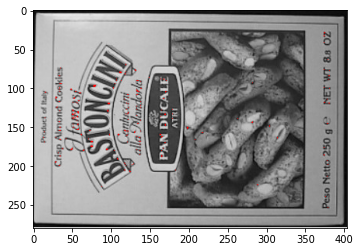

335


In [ ]:
sum = 0
array_after_filter = []
for i in range(len(array_ot)):
  if array_R[i] > 200000000:
    img3[array_ot[i][0], array_ot[i][1]] = [255,0,0]
    array_after_filter.append(array_ot[i])
    sum += 1

plt.imshow(img3)
plt.show()
print(len(array_after_filter))

In [ ]:
from numpy import *

def points_in_circle(x0, y0, rad = 31):
  array = []
  steps = 1000
  rads_of_circle = numpy.linspace(-2*numpy.pi,2*numpy.pi,steps)
  xs = x0 + numpy.cos(rads_of_circle) * rad
  ys = y0 + numpy.sin(rads_of_circle) * rad
  for i in range(len(xs)):
    if xs[i]>=0 and ys[i]>=0 and [int(xs[i]), int(ys[i])] not in array:
      array.append([int(xs[i]), int(ys[i])]) 
  return array



In [ ]:
import math
import numpy
tans = []
for i in range(len(array_after_filter)):
  x_center = array_after_filter[i][0]
  y_center = array_after_filter[i][1]
  arr_points = points_in_circle(x_center, y_center)
  arr_indexes = arr_points
  for j in range(len(arr_points)):
    arr_indexes[j][0] = arr_indexes[j][0] - x_center
    arr_indexes[j][1] = arr_indexes[j][1] - y_center
  m01 = 0
  m10 = 0
  for k in range(len(arr_points)):
    m01 = m01 + arr_indexes[k][1] * img[arr_points[k][0]][arr_points[k][1]][0]
    m10 = m10 + arr_indexes[k][0] * img[arr_points[k][0]][arr_points[k][1]][0]
  tans.append(math.atan2(m01, m10))
tans

[0.6477085290719731,
 0.8356039762983128,
 0.8356039762983128,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.708574513771254,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.708574513771254,
 1.708574513771254,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.7129036755072962,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771254,
 1.708574513771

In [ ]:
S = np.arange(1024).reshape(2,256, 2)
S

array([[[   0,    1],
        [   2,    3],
        [   4,    5],
        ...,
        [ 506,  507],
        [ 508,  509],
        [ 510,  511]],

       [[ 512,  513],
        [ 514,  515],
        [ 516,  517],
        ...,
        [1018, 1019],
        [1020, 1021],
        [1022, 1023]]])

In [ ]:
#паттерн
import random
S = np.arange(1024).reshape(2,256, 2)
for i in range(256):
  x1 = int(random.normalvariate(0, 31**2/25))
  y1 = int(random.normalvariate(0, 31**2/25))
  x2 = int(random.normalvariate(0, 31**2/25))
  y2 = int(random.normalvariate(0, 31**2/25))
  while abs(x1)>16 or abs(x2)>16 or abs(y1)>16 or abs(y2)>16:
    x1 = int(random.normalvariate(0, 31**2/25))
    y1 = int(random.normalvariate(0, 31**2/25))
    x2 = int(random.normalvariate(0, 31**2/25))
    y2 = int(random.normalvariate(0, 31**2/25))
  S[0][i][0] = x1
  S[0][i][1] = y1
  S[1][i][0] = x2
  S[1][i][1] = y2

S

array([[[ 14,  13],
        [ -9,   3],
        [-16, -12],
        ...,
        [  9,  13],
        [ -5,   5],
        [ 11, -12]],

       [[ 10, -12],
        [ -6, -14],
        [ -8,  -1],
        ...,
        [-11,  10],
        [-13,  -3],
        [ -5,   0]]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


20


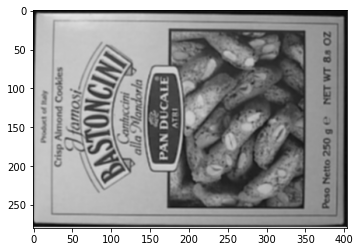

In [ ]:
#размытие фильтром гаусса
result2 = img.copy()
sigma = 1.3
filter = np.zeros((3,3), dtype=np.float)
p=1 #кол-во нулей
for i in range(-1,2):
  for j in range(-1,2):
    filter[i+p,j+p]=np.exp(-(i**2+j**2)/(2*(sigma**2)))
filter/=(np.sqrt(np.pi*2)*(sigma**2))
filter/=filter.sum()
print(result2[2,2,2])
for i in range(result2.shape[0]-2):
  for j in range(result2.shape[1]-2):
    for k in range(3):
      result2[1+i,1+j,k]=np.sum(filter * img[i:i+3, j:j+3, k])
result2 = result2.astype(np.uint8)
plt.imshow(result2)

In [ ]:
with open('descr.txt', 'a') as f:
  f.write("Pattern:\nX:\n")
  for i in range(256):
    f.write("[" + str(S[0][i][0]) + " " + str(S[0][i][1]) + "],")
  f.write("\nY:\n")
  for i in range(256):
    f.write("[" + str(S[1][i][0]) + " " + str(S[1][i][1]) + "],")

In [ ]:
with open('descr.txt', 'a') as f:
  for i in range(len(array_after_filter)):
    x0 = array_after_filter[i][0]
    y0 = array_after_filter[i][1]
    strrr = ""
    strrr += "\nPoint [" + str(x0) + " " + str(y0) + "]\n"
    for k in range(0, 360, 20):
      strrr += str(k) + "degrees\n"
      Rotate = np.array([ [np.cos(k*np.pi/180), -np.sin(k*np.pi/180)], [np.sin(k*np.pi/180), np.cos(k*np.pi/180)]])
      SS = S.dot(Rotate)
      desk = np.zeros(256)
      for j in range(256):
        x1 = int(SS[0][j][0]) + x0
        y1 = int(SS[0][j][1]) + y0
        x2 = int(SS[1][j][0]) + x0
        y2 = int(SS[1][j][1]) + y0
        if x1>=0 and y1>=0 and x2>=0 and y2>=0 and x1<result2.shape[0] and x2<result2.shape[0] and y1<result2.shape[1] and y2<result2.shape[1]:
          if result2[x1, y1, 0] < result2[x2, y2, 0]:
            desk[j] = 1
      strrr += str(desk) + "\n"
    if len(strrr) > 1810:
      f.write(strrr)


